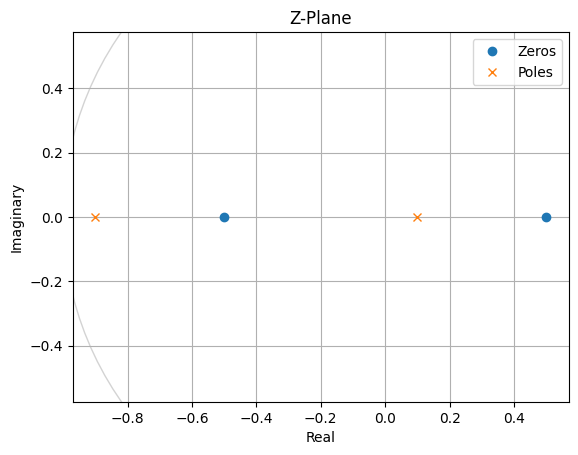

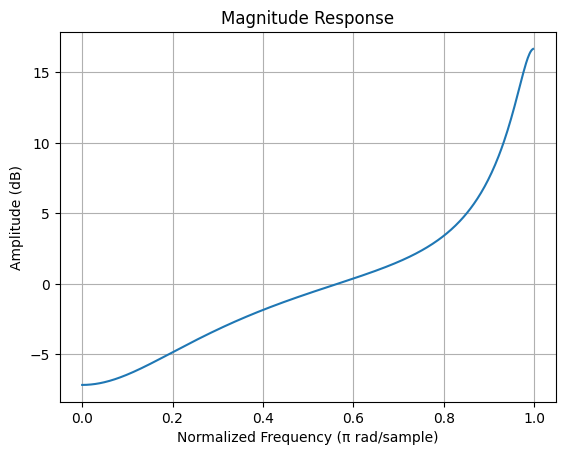

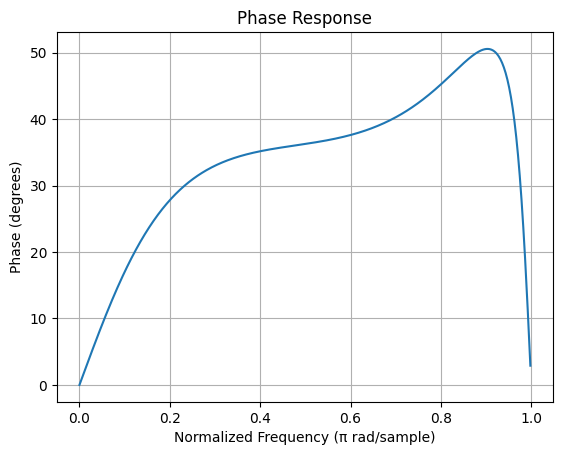

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define the filter's zeros and poles
zeros = np.array([0.5, -0.5])  # Example zeros
poles = np.array([0.1, -0.9])  # Example poles

# Create the z-plane plot with the unit circle
fig, ax = plt.subplots()
unit_circle = plt.Circle((0, 0), 1, color='lightgray', fill=False)
ax.add_artist(unit_circle)
plt.plot(np.real(zeros), np.imag(zeros), 'o', label='Zeros')
plt.plot(np.real(poles), np.imag(poles), 'x', label='Poles')
plt.xlim([-2.5, 2.5])
plt.ylim([-2.5, 2.5])
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Z-Plane')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

# Calculate the filter coefficients from zeros and poles
b, a = signal.zpk2tf(zeros, poles, 1)

# Frequency response
w, h = signal.freqz(b, a)

# Magnitude response
plt.figure()
plt.plot(w/np.pi, 20 * np.log10(abs(h)))
plt.title('Magnitude Response')
plt.xlabel('Normalized Frequency (\u03C0 rad/sample)')
plt.ylabel('Amplitude (dB)')
plt.grid()
plt.show()

# Phase response
plt.figure()
angles = np.unwrap(np.angle(h))
plt.plot(w/np.pi, np.degrees(angles))
plt.title('Phase Response')
plt.xlabel('Normalized Frequency (\u03C0 rad/sample)')
plt.ylabel('Phase (degrees)')
plt.grid()
plt.show()


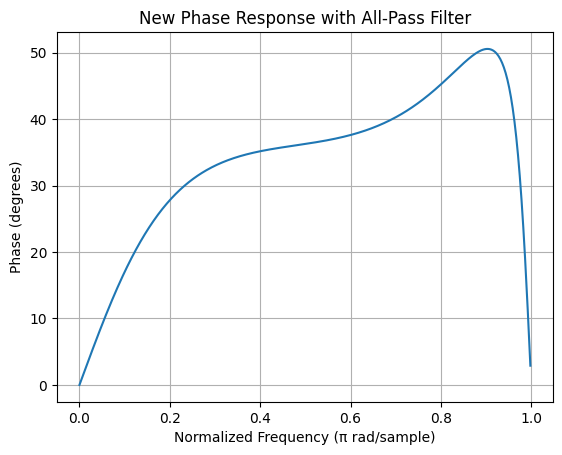

In [2]:
# Your existing filter coefficients
b, a = signal.zpk2tf(zeros, poles, 1)

# Design an all-pass filter (example coefficients)
all_pass_zeros = np.conj(poles)  #Mirrored poles
all_pass_poles = poles
all_pass_gain = 1 

# Calculate the all-pass filter coefficients
b_ap, a_ap = signal.zpk2tf(all_pass_zeros, all_pass_poles, all_pass_gain)

# Cascade the filters by multiplying their coefficients
b_cascaded = np.convolve(b, b_ap)
a_cascaded = np.convolve(a, a_ap)

# Frequency response of the cascaded system
w, h_cascaded = signal.freqz(b_cascaded, a_cascaded)

# New phase response
plt.figure()
angles_cascaded = np.unwrap(np.angle(h_cascaded))
plt.plot(w/np.pi, np.degrees(angles_cascaded))
plt.title('New Phase Response with All-Pass Filter')
plt.xlabel('Normalized Frequency (\u03C0 rad/sample)')
plt.ylabel('Phase (degrees)')
plt.grid()
plt.show()


a is  -0.19891236737965803


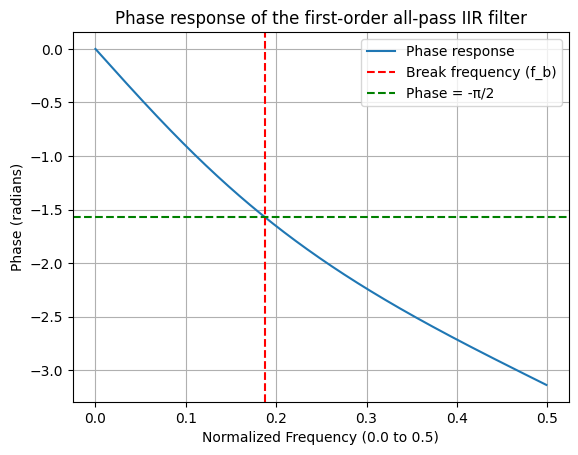

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define the break frequency and sampling frequency
f_c = 3  # Break frequency in Hz
f_s =16  # Sampling frequency in Hz

# Calculate the coefficient 'a' using the tangent function
a = (np.tan(np.pi * f_c / f_s) - 1) / (np.tan(np.pi * f_c / f_s) + 1)
print ("a is ", a)

b = [a, 1]
a_coeffs = [1, a]  # Renamed to avoid confusion with the variable 'a'
w, h = signal.freqz(b, a_coeffs)
angles = np.unwrap(np.angle(h))

# Normalize the frequency range from 0.0 to 0.5
normalized_frequency = w / (2 * np.pi)

# Plot the phase response
plt.figure()
plt.plot(normalized_frequency, angles, label='Phase response')
plt.axvline(x=f_c/f_s, color='red', linestyle='--', label='Break frequency (f_b)')
plt.axhline(y=-np.pi/2, color='green', linestyle='--', label='Phase = -π/2')
plt.title('Phase response of the first-order all-pass IIR filter')
plt.xlabel('Normalized Frequency (0.0 to 0.5)')
plt.ylabel('Phase (radians)')
plt.legend()
plt.grid()
plt.show()


# start


In [4]:
# Function to create TransferFunction for the given Z-transform
def create_allpass_filter(a):
    # Convert string to complex number if necessary
    a = complex(a)
    den = [1,- a]
    num = [- a.conjugate(), 1]  # Use complex conjugate of 'a' in the numerator
    return signal.TransferFunction(num, den)

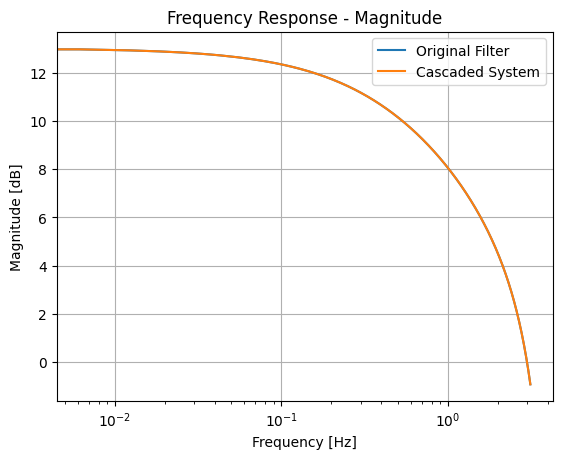

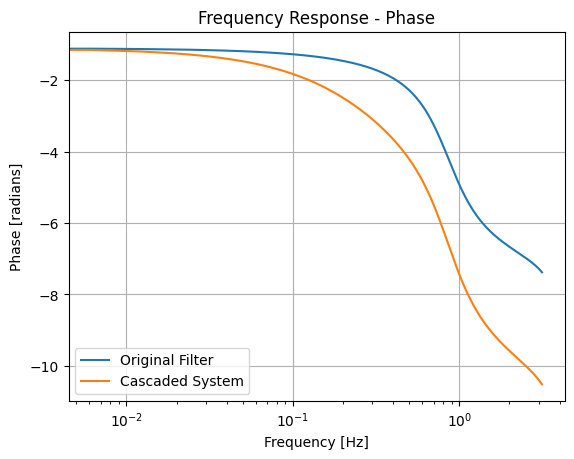

In [5]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt



# Given coordinates and a value for the all-pass filter
a_value_allpass = 0.7
allpass_filter = create_allpass_filter(a_value_allpass)

# Given coordinates for the original filter
complex_zeroes_original = [1 + 1j, -1 - 1j]
complex_poles_original = [0.5 + 0.5j, 0.5 - 0.5j]

# Create TransferFunction for the original filter
original_filter = signal.TransferFunction(np.poly(complex_zeroes_original), np.poly(complex_poles_original))

# Cascade the all-pass filter with the original filter
cascaded_num, cascaded_den = signal.convolve(original_filter.num, allpass_filter.num), signal.convolve(original_filter.den, allpass_filter.den)
cascaded_system = signal.TransferFunction(cascaded_num, cascaded_den)

# Frequency response of the original and cascaded systems
frequencies, response_original = signal.freqz_zpk(complex_zeroes_original, complex_poles_original, 1)
_, response_cascaded = signal.freqz(cascaded_system.num, cascaded_system.den)

# Plot magnitude response
plt.figure()
plt.semilogx(frequencies, 20 * np.log10(np.abs(response_original)), label='Original Filter')
plt.semilogx(frequencies, 20 * np.log10(np.abs(response_cascaded)), label='Cascaded System')
plt.title('Frequency Response - Magnitude')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.legend()
plt.grid(True)
plt.show()

# Plot phase response
plt.figure()
plt.semilogx(frequencies, np.unwrap(np.angle(response_original)), label='Original Filter')
plt.semilogx(frequencies, np.unwrap(np.angle(response_cascaded)), label='Cascaded System')
plt.title('Frequency Response - Phase')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radians]')
plt.legend()
plt.grid(True)
plt.show()


roots of original filter [ 1.+1.j -1.-1.j] [ 0.5+0.5j -0.5-0.5j]
roots of the cascaded system  [-3.33333333+7.77156117e-16j  1.        +1.00000000e+00j
 -1.        -1.00000000e+00j] [ 0.5+5.00000000e-01j -0.5-5.00000000e-01j -0.3-2.06587929e-18j]
roots of the all pass filter  [-3.33333333+0.j] [-0.3+0.j]


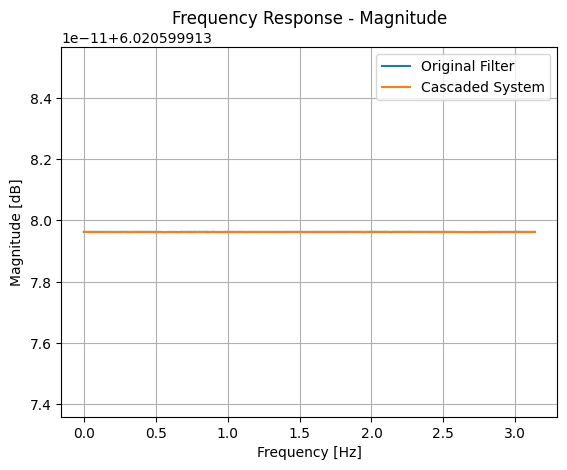

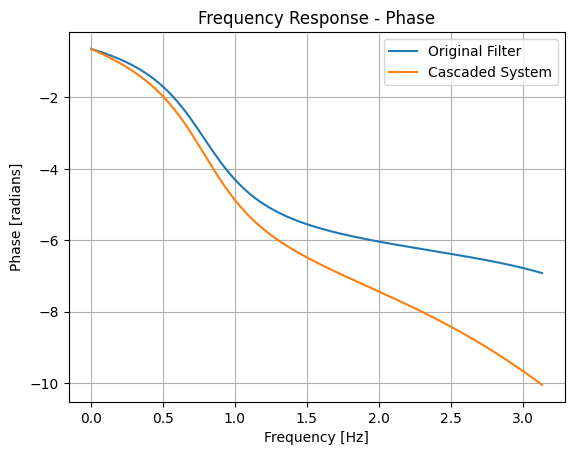

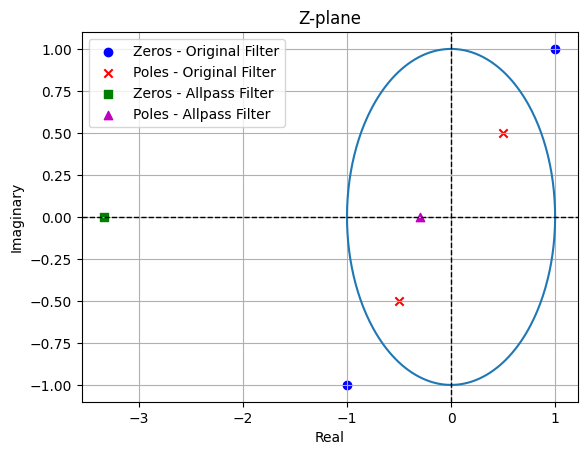

In [6]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt



# Given coordinates and a value for the all-pass filter
a_value_allpass = -0.3
allpass_filter = create_allpass_filter(a_value_allpass)

# Given coordinates for the original filter
complex_zeroes_original = [1 + 1j, -1 - 1j]
complex_poles_original = [0.5 + 0.5j, -0.5 - 0.5j]

# Create TransferFunction for the original filter
original_filter = signal.TransferFunction(np.poly(complex_zeroes_original), np.poly(complex_poles_original))
print("roots of original filter" ,np.roots(original_filter.num), np.roots(original_filter.den))
# Cascade the all-pass filter with the original filter, polynomial multiplication = convolution or cross correlation ya tora
cascaded_num, cascaded_den = signal.convolve(original_filter.num, allpass_filter.num), signal.convolve(original_filter.den, allpass_filter.den)
cascaded_system = signal.TransferFunction(cascaded_num, cascaded_den)
print("roots of the cascaded system ", np.roots(cascaded_num), np.roots(cascaded_den) )
print("roots of the all pass filter ", np.roots(allpass_filter.num), np.roots(allpass_filter.den))
# Frequency response of the original and cascaded systems
frequencies, response_original = signal.freqz_zpk(complex_zeroes_original, complex_poles_original, 1)
_, response_cascaded = signal.freqz(cascaded_system.num, cascaded_system.den)

# Plot magnitude response
plt.figure()
plt.plot(frequencies, 20 * np.log10(np.abs(response_original)), label='Original Filter')
plt.plot(frequencies, 20 * np.log10(np.abs(response_cascaded)), label='Cascaded System')
plt.title('Frequency Response - Magnitude')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.legend()
plt.grid(True)
plt.show()

# Plot phase response
plt.figure()
plt.plot(frequencies, np.unwrap(np.angle(response_original)), label='Original Filter')
plt.plot(frequencies, np.unwrap(np.angle(response_cascaded)), label='Cascaded System')
plt.title('Frequency Response - Phase')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radians]')
plt.legend()
plt.grid(True)
plt.show()

# Plot Z-plane with zeros and poles
plt.figure()
plt.scatter(np.real(complex_zeroes_original), np.imag(complex_zeroes_original), marker='o', color='b', label='Zeros - Original Filter')
plt.scatter(np.real(complex_poles_original), np.imag(complex_poles_original), marker='x', color='r', label='Poles - Original Filter')
plt.scatter(np.real(allpass_filter.zeros), np.imag(allpass_filter.zeros), marker='s', color='g', label='Zeros - Allpass Filter')
plt.scatter(np.real(allpass_filter.poles), np.imag(allpass_filter.poles), marker='^', color='m', label='Poles - Allpass Filter')
plt.plot(np.cos(np.linspace(0, 2 * np.pi, 360)), np.sin(np.linspace(0, 2 * np.pi, 360)))
plt.title('Z-plane')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.axvline(x=0, color='k', linestyle='--', linewidth=1)
plt.axhline(y=0, color='k', linestyle='--', linewidth=1)
plt.legend()
plt.grid(True)
plt.show()


c:\Users\nouran\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_ltisys.py:600: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)


roots of original filter [ 1.+1.j -1.-1.j] [ 0.5+0.5j -0.5-0.5j]
roots of the cascaded system  [-1.00000000e+00-1.j          1.00000000e+00+1.j
  3.00242817e-17+0.66666667j] [-6.66133815e-16+1.5j -5.00000000e-01-0.5j  5.00000000e-01+0.5j
  0.00000000e+00+0.j ]
roots of the all pass filter 1, a is   1.5j [-0.+0.66666667j] [0.+1.5j]


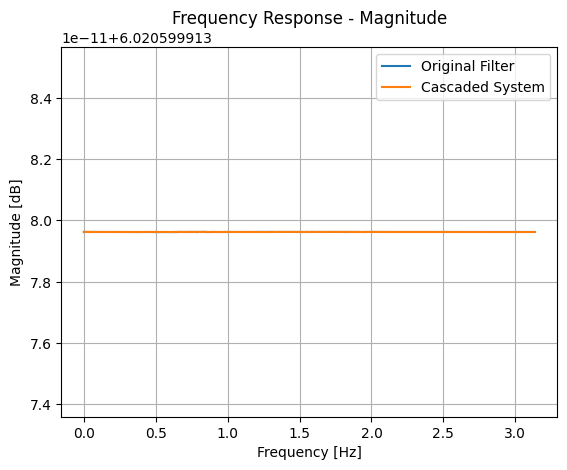

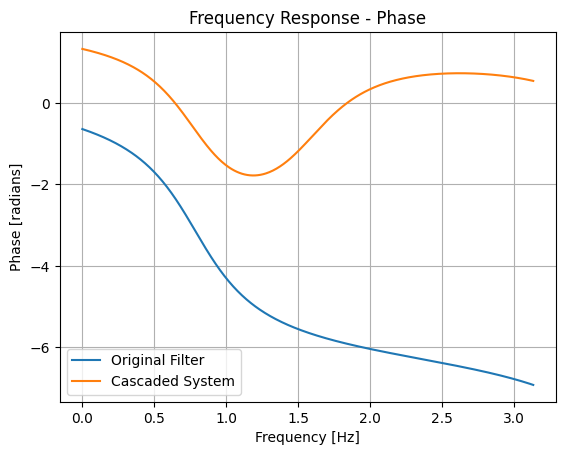

In [7]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt





# Given coordinates and a value for the all-pass filter
a_value_allpass_1 = 1.5j
a_value_allpass_2 = 0.0
allpass_filter_1 = create_allpass_filter(a_value_allpass_1)
allpass_filter_2 = create_allpass_filter(a_value_allpass_2)

# Given coordinates for the original filter
complex_zeroes_original = [1 + 1j, -1 - 1j]
complex_poles_original = [0.5 + 0.5j, -0.5 - 0.5j]

# Create TransferFunction for the original filter
original_filter = signal.TransferFunction(np.poly(complex_zeroes_original), np.poly(complex_poles_original))
print("roots of original filter" ,np.roots(original_filter.num), np.roots(original_filter.den))


# Cascade the all-pass filter with the original filter, polynomial multiplication = convolution or cross correlation ya tora
cascaded_num, cascaded_den = signal.convolve(signal.convolve(original_filter.num, allpass_filter_1.num),allpass_filter_2.num), signal.convolve(signal.convolve(original_filter.den, allpass_filter_1.den),allpass_filter_2.den)
cascaded_system = signal.TransferFunction(cascaded_num, cascaded_den)


print("roots of the cascaded system ", np.roots(cascaded_num), np.roots(cascaded_den) )
print("roots of the all pass filter 1, a is  ",complex(a_value_allpass_1), np.roots(allpass_filter_1.num), np.roots(allpass_filter_1.den))
# Frequency response of the original and cascaded systems
frequencies, response_original = signal.freqz_zpk(complex_zeroes_original, complex_poles_original, 1)
_, response_cascaded = signal.freqz(cascaded_system.num, cascaded_system.den)

# Plot magnitude response
plt.figure()
plt.plot(frequencies, 20 * np.log10(np.abs(response_original)), label='Original Filter')
plt.plot(frequencies, 20 * np.log10(np.abs(response_cascaded)), label='Cascaded System')
plt.title('Frequency Response - Magnitude')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.legend()
plt.grid(True)
plt.show()

# Plot phase response
plt.figure()
plt.plot(frequencies, np.unwrap(np.angle(response_original)), label='Original Filter')
plt.plot(frequencies, np.unwrap(np.angle(response_cascaded)), label='Cascaded System')
plt.title('Frequency Response - Phase')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radians]')
plt.legend()
plt.grid(True)
plt.show()


[0.+0.j 0.+0.j 0.+0.j 0.+0.j]


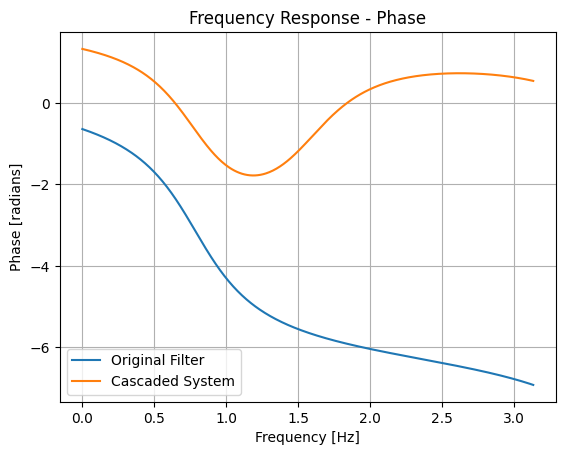

In [8]:
# Deconvolve allpass_filter_2 from the cascaded system
num_after_removal, rem = signal.deconvolve(cascaded_system.num, allpass_filter_2.num)
print(rem)
den_after_removal, _ = signal.deconvolve(cascaded_system.den, allpass_filter_2.den)

# Create a new system after the removal of allpass_filter_2
system_after_removal = signal.TransferFunction(num_after_removal, den_after_removal)
freqs_after_removal , system_after_removal_response = signal.freqz(system_after_removal.num, system_after_removal.den)

# Plot phase response
plt.figure()
plt.plot(freqs_after_removal, np.unwrap(np.angle(response_original)), label='Original Filter')
plt.plot(freqs_after_removal, np.unwrap(np.angle(system_after_removal_response)), label='Cascaded System')
plt.title('Frequency Response - Phase')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radians]')
plt.legend()
plt.grid(True)
plt.show()

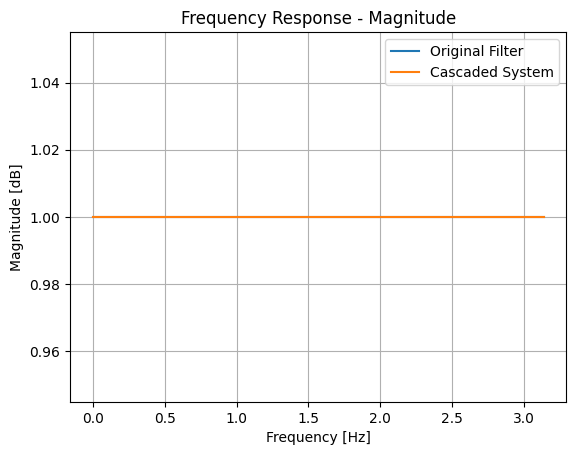

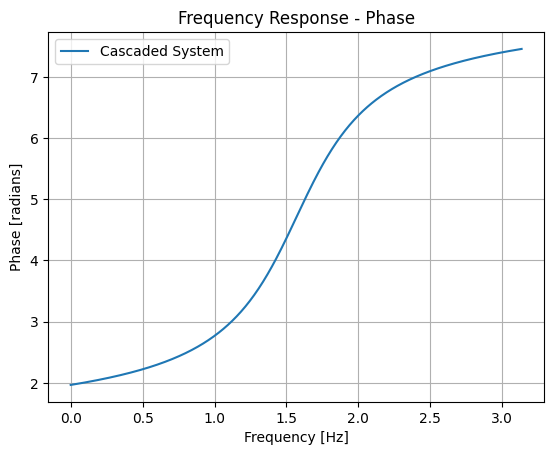

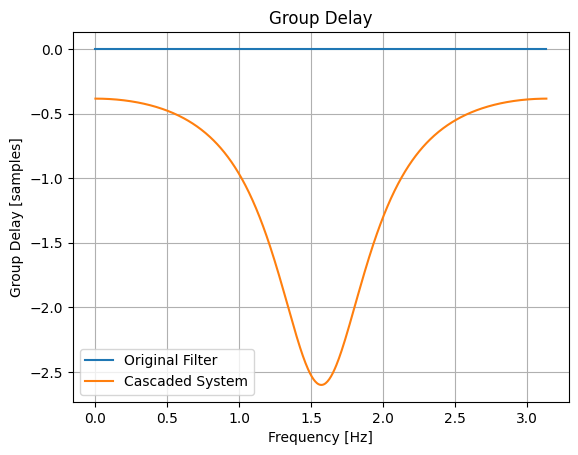

In [9]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt



# Given coordinates and a value for the all-pass filter
a_value_allpass_1 = 1.5j
a_value_allpass_2 = 0.0
allpass_filter_1 = create_allpass_filter(a_value_allpass_1)
allpass_filter_2 = create_allpass_filter(a_value_allpass_2)

# Given coordinates for the original filter
complex_zeroes_original = [0 + 0j]
complex_poles_original =  [0 + 0j]

# Create TransferFunction for the original filter
original_filter = signal.TransferFunction(np.poly(complex_zeroes_original), np.poly(complex_poles_original))

# Cascade the all-pass filter with the original filter
cascaded_num, cascaded_den = signal.convolve(signal.convolve(original_filter.num, allpass_filter_1.num), allpass_filter_2.num), signal.convolve(signal.convolve(original_filter.den, allpass_filter_1.den), allpass_filter_2.den)
cascaded_system = signal.TransferFunction(cascaded_num, cascaded_den)

# Frequency response of the original and cascaded systems
frequencies, response_original = signal.freqz_zpk(complex_zeroes_original, complex_poles_original, 1)
_, response_cascaded = signal.freqz(cascaded_system.num, cascaded_system.den)

# Group delay of the original and cascaded systems
_, group_delay_original = signal.group_delay((original_filter.num, original_filter.den))
_, group_delay_cascaded = signal.group_delay((cascaded_system.num, cascaded_system.den))

# Plot magnitude response
plt.figure()
plt.plot(frequencies, np.abs(response_original), label='Original Filter')
plt.plot(frequencies, np.abs(response_cascaded), label='Cascaded System')
plt.title('Frequency Response - Magnitude')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.legend()
plt.grid(True)
plt.show()

# Plot phase response
plt.figure()
# plt.plot(frequencies, np.unwrap(np.angle(response_original)), label='Original Filter')
plt.plot(frequencies, np.unwrap(np.angle(response_cascaded)), label='Cascaded System')
plt.title('Frequency Response - Phase')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radians]')
plt.legend()
plt.grid(True)
plt.show()

# Plot group delay
plt.figure()
plt.plot(frequencies, group_delay_original, label='Original Filter')
plt.plot(frequencies, group_delay_cascaded, label='Cascaded System')
plt.title('Group Delay')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Group Delay [samples]')
plt.legend()
plt.grid(True)
plt.show()


## Get the roots from all cascaded polynomials

In [17]:
# Zeros of the cascaded system
zeros_cascaded = np.roots(cascaded_system.num)

# Poles of the cascaded system
poles_cascaded = np.roots(cascaded_system.den)

# Separate real and imaginary parts for zeros
zeros_real = [zero.real for zero in zeros_cascaded]
zeros_imag = [zero.imag for zero in zeros_cascaded]

# Separate real and imaginary parts for poles
poles_real = [pole.real for pole in poles_cascaded]
poles_imag = [pole.imag for pole in poles_cascaded]

# Store as coordinates
# Flatten the list of tuples for zeros
zeros_coordinates = [coord for pair in zip(zeros_real, zeros_imag) for coord in pair]

# Flatten the list of tuples for poles
poles_coordinates = [coord for pair in zip(poles_real, poles_imag) for coord in pair]
print("zeors and pooles of transfer function " , zeros_coordinates, poles_coordinates)


zeors and pooles of transfer function  [-0.0, 0.6666666666666666, 0.0, 0.0] [0.0, 1.5, 0.0, 0.0, 0.0, 0.0]


## constructing the library

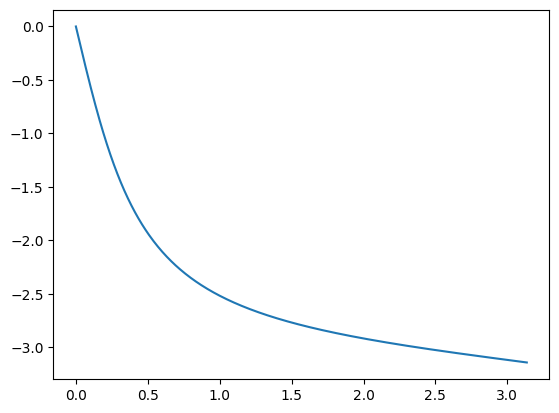

In [11]:
# Given coordinates and a value for the all-pass filter
a_value_allpass = 0.7
allpass_filter = create_allpass_filter(a_value_allpass) 
omegas,allpass_response = signal.freqz(allpass_filter.num, allpass_filter.den)
phase = np.unwrap(np.angle(allpass_response))
mag =  np.abs(allpass_response)
plt.plot(omegas, phase)

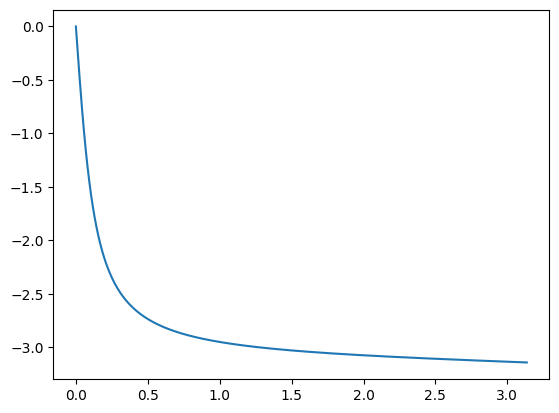

In [12]:
# Given coordinates and a value for the all-pass filter
a_value_allpass = 0.9
allpass_filter = create_allpass_filter(a_value_allpass) 
omegas,allpass_response = signal.freqz(allpass_filter.num, allpass_filter.den)
phase = np.unwrap(np.angle(allpass_response))
mag = np.abs(allpass_response)
plt.plot(omegas, phase)

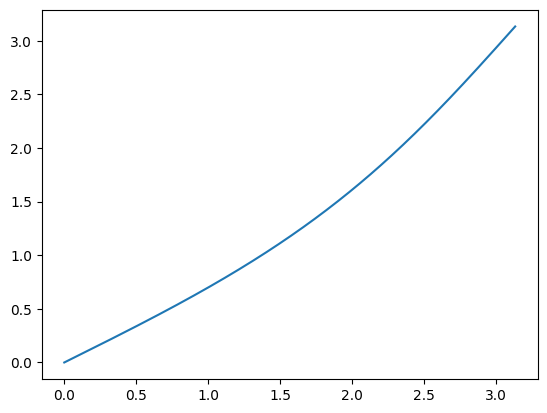

In [13]:
# Given coordinates and a value for the all-pass filter
a_value_allpass = -5
allpass_filter = create_allpass_filter(a_value_allpass) 
omegas,allpass_response = signal.freqz(allpass_filter.num, allpass_filter.den)
phase = np.unwrap(np.angle(allpass_response))
mag = np.abs(allpass_response)
plt.plot(omegas, phase)

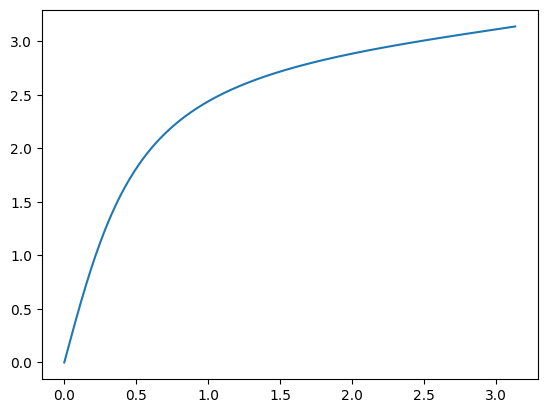

In [14]:
# Given coordinates and a value for the all-pass filter
a_value_allpass = 1.5
allpass_filter = create_allpass_filter(a_value_allpass) 
omegas,allpass_response = signal.freqz(allpass_filter.num, allpass_filter.den)
phase = np.unwrap(np.angle(allpass_response))
mag = np.abs(allpass_response)
plt.plot(omegas, phase)

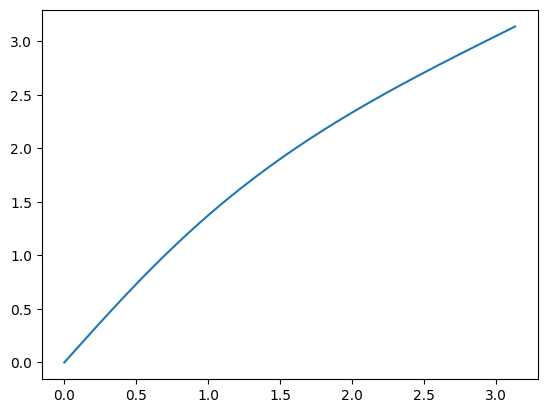

In [15]:
# Given coordinates and a value for the all-pass filter
a_value_allpass = 5
allpass_filter = create_allpass_filter(a_value_allpass) 
omegas,allpass_response = signal.freqz(allpass_filter.num, allpass_filter.den)
phase = np.unwrap(np.angle(allpass_response))
mag = np.abs(allpass_response)
plt.plot(omegas, phase)

## Real-time Filtering

In [16]:

import numpy as np
from scipy import signal

# Define the roots
roots_num = [0.5 + 0.5j, 0.5 - 0.5j]
roots_den = [0.25 + 0.25j, 0.25 - 0.25j]

# Get the coefficients from the roots
b = np.poly(roots_num)  # Numerator coefficients
a = np.poly(roots_den)  # Denominator coefficients

# Define a sample signal
signal = np.random.rand(10)

# Initialize buffers
buffer_x = np.zeros(len(b))  # input buffer
buffer_y = np.zeros(len(a))  # output buffer

# Create an array to store the output
output = np.zeros_like(signal)

# For each sample...
for n in range(len(signal)):
    # Shift the buffers
    buffer_x[:-1] = buffer_x[1:]
    buffer_y[:-1] = buffer_y[1:]
    print("bx", buffer_x)
    

    # Read new input sample
    buffer_x[-1] = signal[n]
    print("bx", buffer_x, n)


    # Apply difference equation
    y = np.sum(b * buffer_x) - np.sum(a[1:] * buffer_y[1:])

    # Store output sample
    buffer_y[-1] = y
    output[n] = y


bx [0. 0. 0.]
bx [0.         0.         0.96310116] 0
bx [0.         0.96310116 0.96310116]
bx [0.         0.96310116 0.33518641] 1
bx [0.96310116 0.33518641 0.33518641]
bx [0.96310116 0.33518641 0.93823829] 2
bx [0.33518641 0.93823829 0.93823829]
bx [0.33518641 0.93823829 0.54000615] 3
bx [0.93823829 0.54000615 0.54000615]
bx [0.93823829 0.54000615 0.17011093] 4
bx [0.54000615 0.17011093 0.17011093]
bx [0.54000615 0.17011093 0.8656813 ] 5
bx [0.17011093 0.8656813  0.8656813 ]
bx [0.17011093 0.8656813  0.97238688] 6
bx [0.8656813  0.97238688 0.97238688]
bx [0.8656813  0.97238688 0.49727616] 7
bx [0.97238688 0.49727616 0.49727616]
bx [0.97238688 0.49727616 0.82166966] 8
bx [0.49727616 0.82166966 0.82166966]
bx [0.49727616 0.82166966 0.91917494] 9
